In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score , make_scorer
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

In [8]:
# Load the dataset
file_path = 'd:/IntelliHack5/customer_behavior_analytcis.csv'
df = pd.read_csv(file_path)

In [9]:
# Display the first few rows of the dataset
print(df.head())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  


In [4]:
# EDA - Exploratory Data Analysis
# Check for missing values
print(df.isnull().sum())

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


In [17]:
# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
# Select columns excluding only 'customer_id' and apply imputation
df_imputed_values = imputer.fit_transform(df.drop(columns=['customer_id']))

# Reconstruct DataFrame with original column names (excluding 'customer_id')
df_imputed = pd.DataFrame(df_imputed_values, columns=df.drop(columns=['customer_id']).columns)

In [18]:
# EDA - Exploratory Data Analysis
# Check for missing values
print(df_imputed.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
dtype: int64


In [30]:
# Feature Engineering - Create new features
df_imputed['purchase_per_click'] = df_imputed['total_purchases'] / df_imputed['product_click']
df_imputed['discount_per_purchase'] = df_imputed['discount_counts'] / df_imputed['total_purchases']



In [27]:
df_imputed

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,purchase_per_click,discount_per_purchase
0,7.0,129.34,52.17,18.0,0.0,0.388889,0.000000
1,22.0,24.18,9.19,15.0,7.0,1.466667,0.318182
2,2.0,32.18,90.69,50.0,2.0,0.040000,1.000000
3,25.0,26.85,11.22,16.0,10.0,1.562500,0.400000
4,7.0,125.45,34.19,30.0,3.0,0.233333,0.428571
...,...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,0.100000,0.200000
995,5.0,68.36,75.41,43.0,1.0,0.116279,0.200000
996,18.0,19.53,28.77,18.0,8.0,1.000000,0.444444
997,4.0,28.97,72.27,57.0,3.0,0.070175,0.750000


In [31]:
df_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)
df_imputed.fillna(0, inplace=True)

In [32]:
df_imputed

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,purchase_per_click,discount_per_purchase
0,7.0,129.34,52.17,18.0,0.0,0.388889,0.000000
1,22.0,24.18,9.19,15.0,7.0,1.466667,0.318182
2,2.0,32.18,90.69,50.0,2.0,0.040000,1.000000
3,25.0,26.85,11.22,16.0,10.0,1.562500,0.400000
4,7.0,125.45,34.19,30.0,3.0,0.233333,0.428571
...,...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,0.100000,0.200000
995,5.0,68.36,75.41,43.0,1.0,0.116279,0.200000
996,18.0,19.53,28.77,18.0,8.0,1.000000,0.444444
997,4.0,28.97,72.27,57.0,3.0,0.070175,0.750000


In [33]:
# Data Preprocessing
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [34]:
# Apply Power Transformation to make data more Gaussian-like
pt = PowerTransformer()
df_transformed = pt.fit_transform(df_scaled)

In [49]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_transformed)

In [50]:
# Further Dimensionality Reduction using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_transformed)

In [51]:
# Model Selection - Using the Elbow Method to find the optimal number of clusters for K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

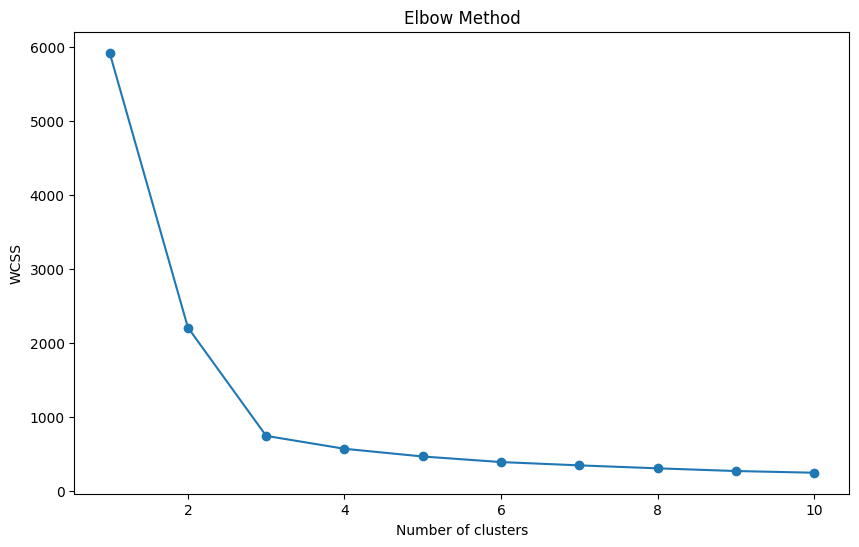

In [52]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [53]:
# Optimal number of clusters (adjust based on the elbow method)
optimal_clusters = 3

# Evaluate different number of clusters using Silhouette Score
best_score = -1
best_n_clusters = None
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {score}")
    
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

Silhouette Score for 2 clusters: 0.5751672539008575
Silhouette Score for 3 clusters: 0.6579069266275297
Silhouette Score for 4 clusters: 0.6025859212210543
Silhouette Score for 5 clusters: 0.5122236637248708
Silhouette Score for 6 clusters: 0.40249748314675976


In [55]:
best_n_clusters

3

In [56]:
# Fit the final K-Means model with the best number of clusters
final_kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
final_kmeans.fit(df_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [57]:
# Model Evaluation - Silhouette Score for K-Means (after final fitting)
labels_kmeans = final_kmeans.labels_  # Get the cluster labels from the fitted final K-Means model
silhouette_avg_kmeans = silhouette_score(df_pca, labels_kmeans)  # Compute the silhouette score
print(f'K-Means Silhouette Score: {silhouette_avg_kmeans}')


K-Means Silhouette Score: 0.6579069266275297


In [58]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
labels_agg = agg_clustering.fit_predict(df_pca)
silhouette_avg_agg = silhouette_score(df_pca, labels_agg)
print(f'Agglomerative Clustering Silhouette Score: {silhouette_avg_agg}')

Agglomerative Clustering Silhouette Score: 0.6572117658783436


In [60]:
# Add the cluster labels to the original dataframe
df['Cluster_KMeans'] = labels_kmeans
df['Cluster_Agg'] = labels_agg
df['Cluster_DBSCAN'] = labels_dbscan

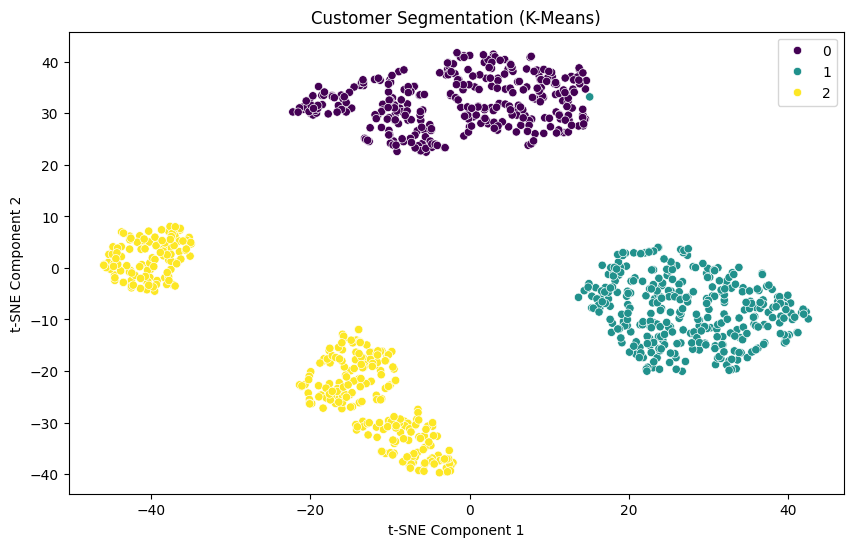

In [61]:
# Visualize the clusters using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=labels_kmeans, palette='viridis')
plt.title('Customer Segmentation (K-Means)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

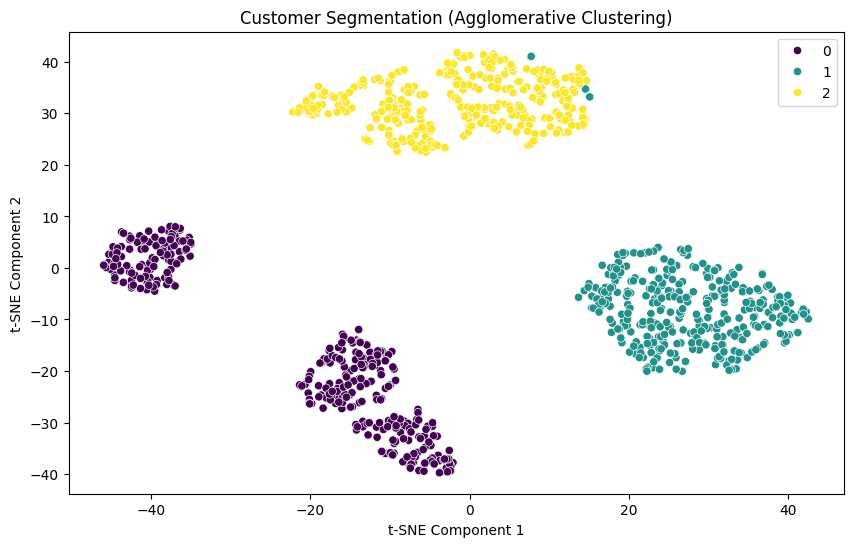

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=labels_agg, palette='viridis')
plt.title('Customer Segmentation (Agglomerative Clustering)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()